# Predictions in Heart Failure Using Machine Learning 

## INFO 1998 Fall '21 Final Project

##  Fernando Celaya, Ming DeMers, Marcus Posey.

__Introduction__

The following project will attempt to predict and understand what factors of lifestyle and illnesses can cause heart failure and subsequent death. It will utilize machine learning techniques and models learned throughout the duration of INFO 1998. 

By visualizing data, predicting trends, applying models, and extrapolating and interpolating data points, we can hopefully can an insightful understanding of what factors most directly cause or lead to heart failure.

__Sources__ 

The following CSV dataset was obtained under the CC 4.0 free and public use license, as hosted by Kaggle.com and its publishers. 

The dataset can be found here: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data/metadata

This dataset utilizes data collected for the UCI Machine Learning Repository, as cited:

    Davide Chicco, Giuseppe Jurman: "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone". BMC Medical Informatics and Decision Making 20, 16 (2020). [Web Link]

__________

# Data at a First-Look

We must first import the data. The set contains useful information and features and their range that are described as follows:

- Age: ∈ {∞} 
_Patient's age_

- Anaemia: ∈ {0,1}
_Whether a patient has a condition where there is a decrease of hemoglobin or not_

- Creatinine Phosphokinase: ∈ {∞}
_Level of the enzyme in the patient's blood (mcg/L)_

- Diabetes: ∈ {0,1}
_Whether the patient has diabetes or not_

- Ejection Fraction: ∈ {0,100} 
_Percentage of blood leaving the heart at each contraction_

- High Blood Pressure: ∈ {0,1}
_Whether the patient has HBP or not_

- Platelets: ∈ {∞} 
_Platelets in the blood (kiloplatelets/mL)_

- Serum Creatinine: ∈ {∞}
_Level of serum creatinine in the blood (mg/dL)_

- Serum Sodium: ∈ {∞}
_Level of serum sodium in the blood (mEq/L)_

- Sex: ∈ {0,1}
_0 if woman, 1 if man_

- Smoking: ∈ {0,1}
_Whether the patient smokes or not_

- Time: ∈ {∞}
_Follow-up period (in days)_

- Death Event: ∈ {0,1}
_If the patient has passed since the follow-up_


It is also helpful to see the mean, median, and other statistics of the data.

In [24]:
# Import necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [25]:
# Load data and get some general info

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [26]:
# Generate descriptive statistics.

df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


___

# Data Visualization

We now look at our data in fancy graphs to look for trends and understand what features may be of interest. We'll look for what features are dominant and how they're distributed amongst patients.

### Let's start with the obvious: how does smoking affect whether a person lives or not?

<ipython-input-27-ac1faf1c5bdb>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  smkr_s = smoker[df['DEATH_EVENT']==0]
<ipython-input-27-ac1faf1c5bdb>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  smkr_d = smoker[df['DEATH_EVENT']==1]
<ipython-input-27-ac1faf1c5bdb>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  non_s = non_smoker[df['DEATH_EVENT']==0]
<ipython-input-27-ac1faf1c5bdb>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  non_d = non_smoker[df['DEATH_EVENT']==1]


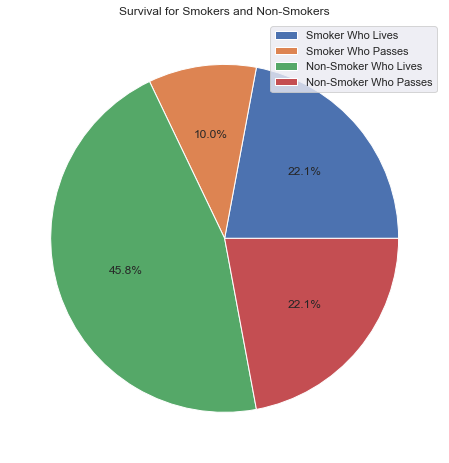

In [27]:
#Create a pie chart of whether they are a smoker and if they lived or not

smoker = df[df['smoking']==1]
non_smoker = df[df['smoking']==0]

smkr_s = smoker[df['DEATH_EVENT']==0]
smkr_d = smoker[df['DEATH_EVENT']==1]
non_s = non_smoker[df['DEATH_EVENT']==0]
non_d = non_smoker[df['DEATH_EVENT']==1]

plt.pie(x=[len(smkr_s), len(smkr_d), len(non_s), len(non_d)], autopct='%1.1f%%',)
plt.legend(['Smoker Who Lives', 'Smoker Who Passes','Non-Smoker Who Lives', 'Non-Smoker Who Passes'])
plt.title('Survival for Smokers and Non-Smokers')

plt.show()

*Somewat surprisingly, more non-smokers died that smokers. However, non-smokers in total fared better than smokers.*

### Next, let's examine how follow-ups are distributed over those who survived and those who died. 

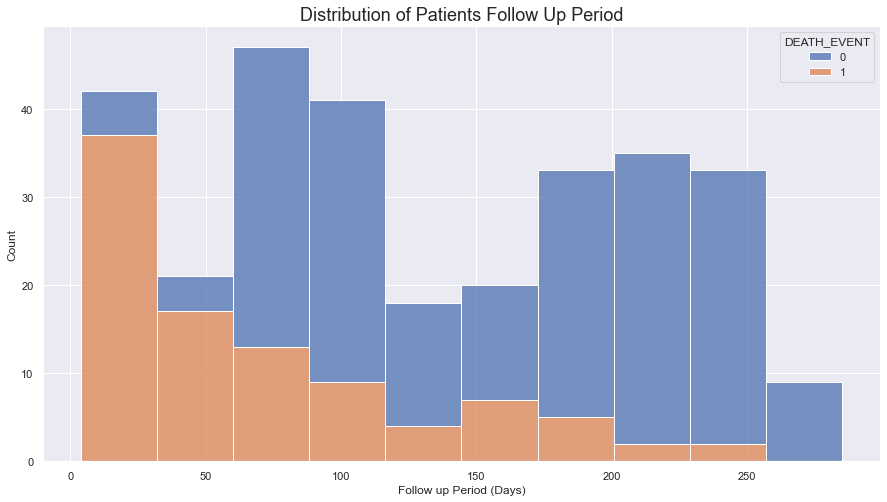

In [28]:
#histogram plot to see distribution of death events over time

plt.figure()

for i, num in enumerate(["time"]):
    sns.histplot(data = df, x= num, hue = 'DEATH_EVENT', multiple = 'stack')

plt.xlabel('Follow up Period (Days)')
plt.ylabel('Count')
plt.title('Distribution of Patients Follow Up Period', fontsize=18)

plt.show()

*We see an overhwleming majority of the deaths occur within the first 25 days, more than 50%. As the follow-up time increases, there are many more instances of survival than death.*

### Let's look at all the features in a pairwise heatmap. It will give us a better idea of correlation than manually comparing two features every time.

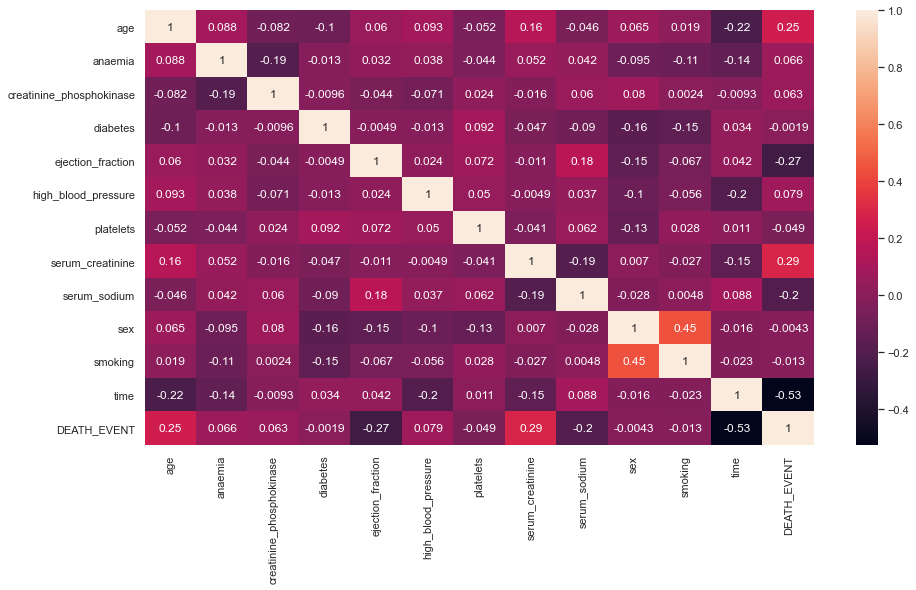

In [29]:
# Compute pairwise correlation of columns, excluding NA/null values.

corr = df.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr, annot=True)
plt.show()

*From the heatmap, we can see that the following are most correlated with patient outcome:*
 - *ejection fraction*
 - *serum creatinine*
 - *time*
 - *age*
 
*We'll be using these data for our training and machine learning portion, rather than the entire data set*

### For now, let's continue analysing our new features of inerest.

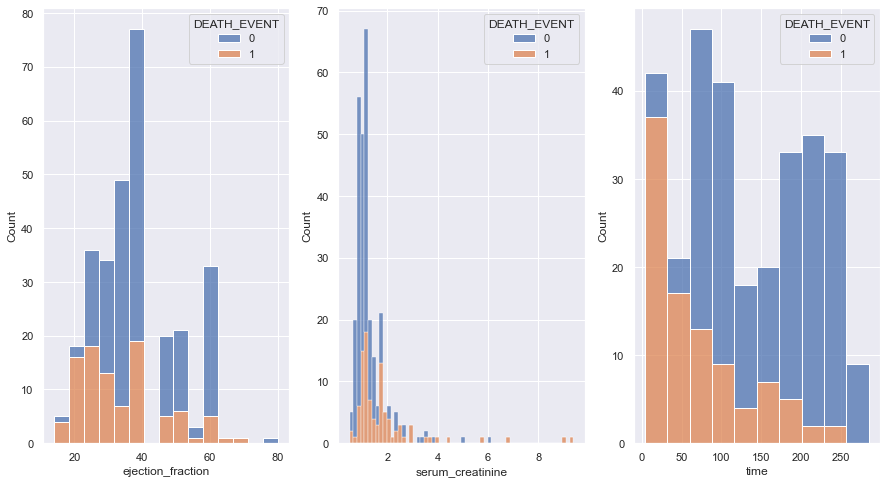

In [30]:
# Plotting the impact variables on DEATH_EVENT

plt.figure()

for i, num in enumerate(["ejection_fraction","serum_creatinine","time"]):
    plt.subplot(1,3,i+1)
    sns.histplot(data = df, x= num, hue = 'DEATH_EVENT', multiple = 'stack')
plt.show()

(40.0, 95.0)

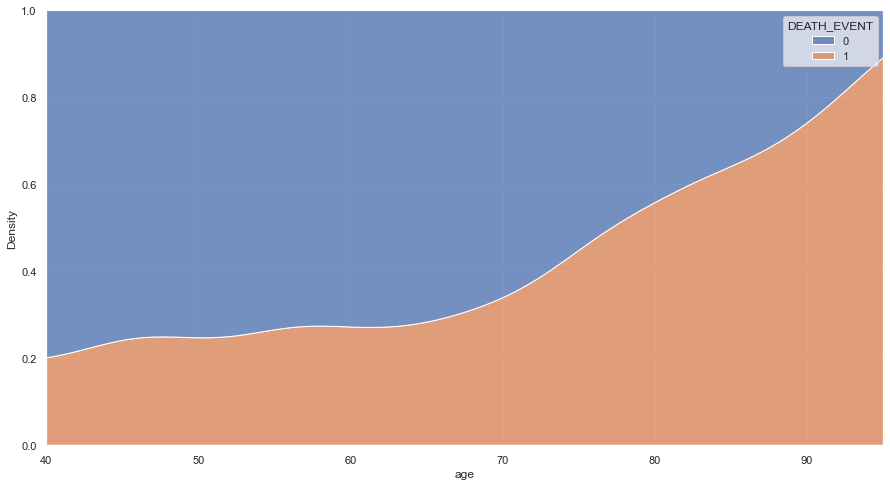

In [31]:
# Create a kernel density estimate (KDE) plot

sns.kdeplot(data=df[['age','DEATH_EVENT']],x='age',hue='DEATH_EVENT',multiple='fill')
plt.xlim(df['age'].min(),df['age'].max())

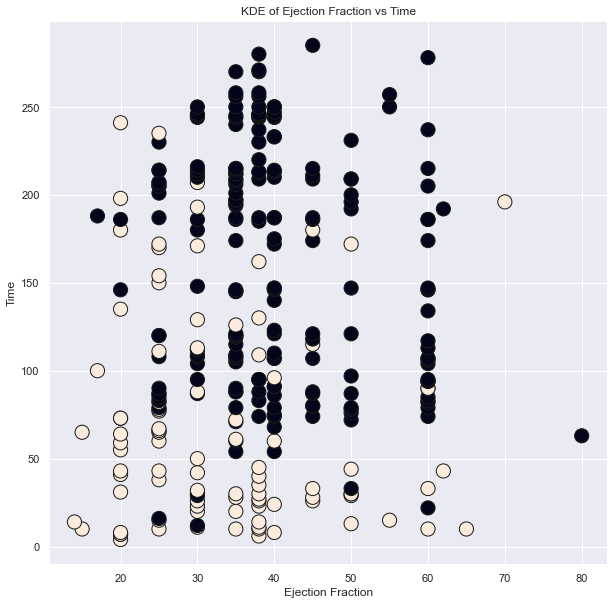

In [32]:
# Create a scatter plot

fig = plt.figure(figsize=(10, 10))
plt.scatter(df['ejection_fraction'], df['time'],
            
           linewidths=1, alpha=1,
           edgecolor='k',
           s = 200,
           c=df['DEATH_EVENT'])
      
plt.title('KDE of Ejection Fraction vs Time')
plt.xlabel('Ejection Fraction')
plt.ylabel('Time')
          
plt.show()

____

# Machine Learning Magic

We now apply concepts of ML to predict how these features correlate (or don't) to patient outcome.

### Let's first see if we can apply what we learned from Lecture 9:

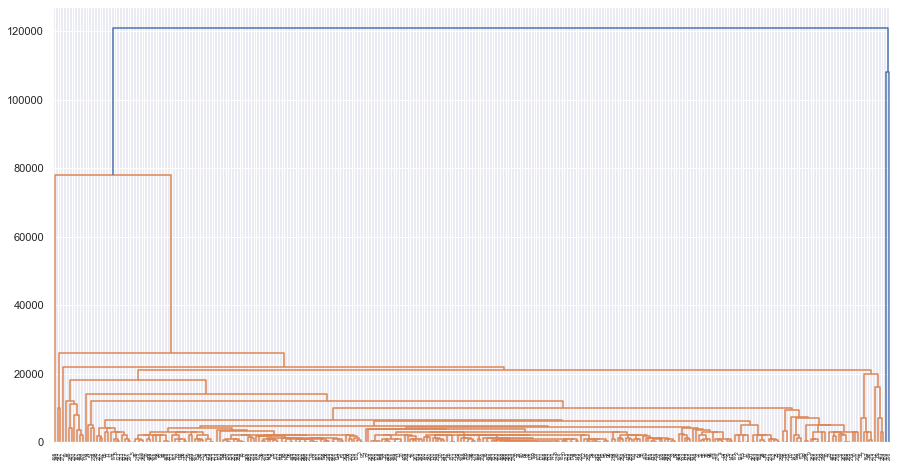

In [33]:
#Hierarchical Clustering on our dataset
risk = StandardScaler().fit_transform(df)

cluster = linkage(df, 'single')
fig = plt.figure()
dn = dendrogram(cluster)

*There are far too many features, some continous and others categorical, to make sense out of this cluster*

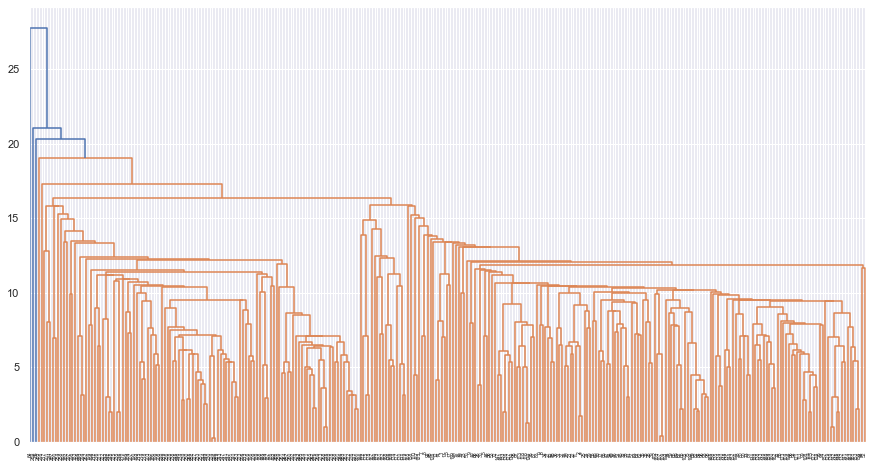

In [34]:
risk = StandardScaler().fit_transform(df[['age', 'serum_creatinine', 'time', 'ejection_fraction']])

cluster = linkage(df[['age', 'serum_creatinine', 'time', 'ejection_fraction']], 'single')
fig = plt.figure()
dn = dendrogram(cluster)

*And narrowing it down doesn't seem to help either. Let's try something different.*

### We're now going to split the data into training and target values to create a model.

In [35]:
# Separate the age, serum creatinine, time, ejection fraction (features) and the death event (target)
features = df[['age', 'serum_creatinine', 'time', 'ejection_fraction']]
target = df['DEATH_EVENT']

# Train test split the data with 20% being used for testing
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# A list to save all the values from different models accuracy for comparaison using a bar chart
accuracy_list = [] 

#a list of the models will be fitting
models = ["Logistic Regression","KNearestNeighbors","Decision Tree","Random Forest"]

### Create and fit a logistic curve onto our data.

In [36]:
# Create a logistic regression model
logistic = LogisticRegression()

# Fit the model using the train data
logistic.fit(x_train, y_train)

# Store the predictions for the training and test set
pred_train = logistic.predict(x_train)
pred_test = logistic.predict(x_test)

# Print the test and training accuracy
print("Test Accuracy: ", accuracy_score(y_test, pred_test))
print("Training Accuracy: ", accuracy_score(y_train, pred_train))

accuracy_list.append(accuracy_score(y_test, pred_test))

Test Accuracy:  0.7888888888888889
Training Accuracy:  0.84688995215311


In [37]:
# Use confusion matrix to tune and validate model

tn, fp, fn, tp = confusion_matrix(y_test, logistic.predict(x_test)).ravel()
(tn+tp)/(tn+tp+fp+fn)

0.7888888888888889

### Let's do some error analysis

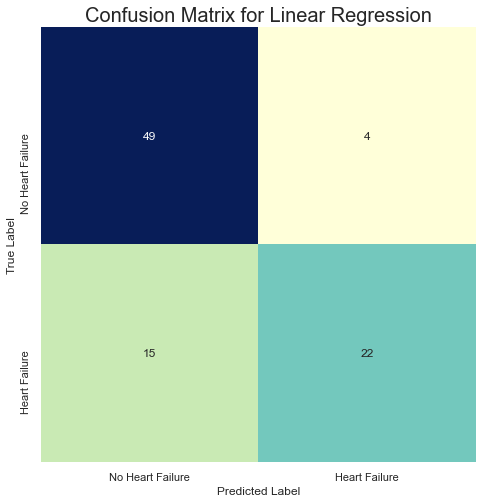

In [38]:
# Plot a confusion matrix for error analysis
plt.figure()
con_matrix = confusion_matrix(y_test, logistic.predict(x_test))
sns.heatmap(con_matrix, cmap='YlGnBu', annot=True, cbar=False, square=True, xticklabels=['No Heart Failure', 'Heart Failure'], yticklabels=['No Heart Failure', 'Heart Failure'] )



plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Linear Regression', fontsize = 20)
plt.show()

*In summary, we've randomly split the data into training and target sets. The logarithmic model was able to accurately classify 49 instances of no heart failure and 22 instances of heart failure, which is good.*

*However, there are 19 instances of incorrect classifications. There are 4 cases of false positives, where patients were expected to have died when they actually survived, and 15 cases of false negatives, where patients were expected to live when they actually died.*

*Thus, we see that our model produces a test accuracy of 79% and training accuracy of 85%*

### Let's try some other models, too. We'll use the same split for consistency, and compare accuracies at the end.

In [39]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(x_train, y_train)
knn_prediction = knn_model.predict(x_test)

print("Test Accuracy: ", accuracy_score(y_test, pred_test))
print("Training Accuracy: ", accuracy_score(y_train, pred_train))

accuracy_list.append(accuracy_score(y_test, pred_test))

Test Accuracy:  0.7888888888888889
Training Accuracy:  0.84688995215311


In [40]:
# Use confusion matrix to tune and validate model

tn, fp, fn, tp = confusion_matrix(y_test, knn_model.predict(x_test)).ravel()
(tn+tp)/(tn+tp+fp+fn)

0.7555555555555555

In [41]:
# Create a decision tree classifier

tree = DecisionTreeClassifier(max_depth = 1)
tree.fit(x_train, y_train)

# Store the predictions for the training and test set
pred_train = tree.predict(x_train)
pred_test = tree.predict(x_test)

# Print the test and training accuracy
print("Test Accuracy: ", accuracy_score(y_test, pred_test))
print("Training Accuracy: ", accuracy_score(y_train, pred_train))

accuracy_list.append(accuracy_score(y_test, pred_test))

Test Accuracy:  0.7666666666666667
Training Accuracy:  0.8803827751196173


In [42]:
# Use confusion matrix to tune and validate model

tn, fp, fn, tp = confusion_matrix(y_test, tree.predict(x_test)).ravel()
(tn+tp)/(tn+tp+fp+fn)

0.7666666666666667

In [43]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)

forest_prediction = forest.predict(x_test)

pred_train = forest.predict(x_train)
pred_test = forest.predict(x_test)

print("Test Accuracy: ", accuracy_score(y_test, pred_test))
print("Training Accuracy: ", accuracy_score(y_train, pred_train))

accuracy_list.append(accuracy_score(y_test, pred_test))

Test Accuracy:  0.7444444444444445
Training Accuracy:  1.0


In [44]:
# Use confusion matrix to tune and validate model

tn, fp, fn, tp = confusion_matrix(y_test, logistic.predict(x_test)).ravel()
(tn+tp)/(tn+tp+fp+fn)

0.7888888888888889

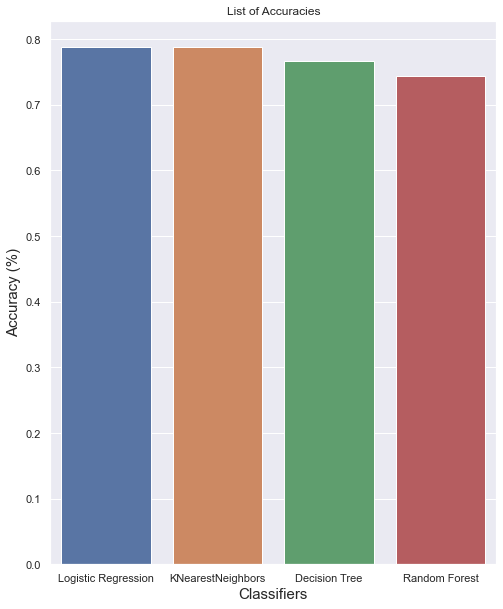

[0.7888888888888889,
 0.7888888888888889,
 0.7666666666666667,
 0.7444444444444445]

In [45]:
# Create and print a plot of the accuracies in a bar plot
plt.figure(figsize=(8,10))
brplt = sns.barplot(x=models, y=accuracy_list)
plt.xlabel("Classifiers", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)
plt.title("List of Accuracies")

plt.show()

accuracy_list

*This plot shows that Logistic Regression and KNN models were the most accurate, around 79%. However, this value could change if train test split were run differently and with different parameters*

______

# Conclusion

Overall, the project shows that a Log and KNN model are most accurate on our data for the four selected features. This was achieved by first identifying what features were most correlated with death outcome. Finding them to be age, serum creatinine, time, ejection fraction via a heat map, we then split the data randomly and ran numerous machine learning models on them. The result showed that these features are logarithmically correlated to death outcome.

Thus, we see that these four factors are increase an individuals risk to heart attacks and subsequent death. The older a person, the older their heart and therefore they are likely to have a  weaker ejection fraction. Moreover, kideny function, as measured by serum creatinine can indicate blood that isn't filtered as well. All these factors can come together to cause weaker heart function such as perfusion and circulation. As a result, the body is more susceptible to heart failure and death.

In the future, it would be interesting to explore the other features, and maybe more of them at the same time. Other ML models outside of the scope of the course, too, would be interesting to learn and apply to this project. Moreover, it would be fascinating to understand what lifestyle choices affect the studied features, and what a person can do to mitigate their risk.